## Data Visualizations Using Seaborn

Seaborn is used for more complex visualizations
Built on matplotlib and works best with pandas dataframes

##### Seaborn Cheat sheet
https://datacamp-community-prod.s3.amazonaws.com/f9f06e72-519a-4722-9912-b5de742dbac4


In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
grant_file=pd.read_csv("https://raw.githubusercontent.com/rakeshsukumar/python_data_viz_training/master/Input/Seaborn/schoolimprovement2010grants.csv")
grant_file.head(5)

### Univariate Analysis

#### 1. Pandas Histogram vs Seaborn distplot

#### 2. KDE Plot (Kernel Density Estimate Plot)

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable

#### 3. Rug Plot
A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. It is used to visualise the distribution of the data. As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot


In [ ]:
# Displays a pandas histogram
grant_file["Award_Amount"].plot.hist()


In [ ]:
# Clear the histogram
plt.clf()

# Display a Seaborn distplot
sns.distplot(grant_file['Award_Amount'])
plt.show()

# Clear the pevious plot
plt.clf()


In [ ]:
# Display a Seaborn distplot with options on KDE and bins
sns.distplot(grant_file['Award_Amount'],kde=False, bins=20)
plt.show()

# Clear the plot
plt.clf()

In [ ]:
# Display a Seaborn distplot with options on hist and rug and 
sns.distplot(grant_file['Award_Amount'],hist=False, rug=True,kde_kws={'shade':True})
plt.show()

### Bivariate Analysis

#### 1. Regplot
Regression Plot to show relationship between two variables

#### 2. lmplot 
Built on top of Regplot , lmplot is much more powerful and flexible.

#### 3. Faceting
Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have, say, four, arranged together in a grid.


In [ ]:
insurance_premiums_df=pd.read_csv("https://raw.githubusercontent.com/rakeshsukumar/python_data_viz_training/master/Input/Seaborn/insurance_premiums.csv")

# Create a regression plot of premiums vs. insurance_losses
#sns.regplot(insurance_premiums["insurance_losses"],insurance_premiums["premiums"])
sns.regplot(data=insurance_premiums_df,x="insurance_losses",y="premiums")

# Display the plot
plt.show()

In [ ]:
sns.lmplot(data=insurance_premiums_df,x="insurance_losses",y="premiums",hue="Region")
plt.show()

In [ ]:
# FACETING TO SEE DATA MORE CLEARLY
sns.lmplot(data=insurance_premiums_df,x="insurance_losses",y="premiums",row="Region")
plt.show()

### Seaborn Styles 

In [ ]:
sns.set() #for default seaborn style
# Display a Seaborn distplot
sns.distplot(grant_file['Award_Amount'])
plt.show()

In [ ]:
for style in ['white','dark','whitegrid','darkgrid','ticks']:
    sns.set_style(style)
    sns.distplot(grant_file['Award_Amount'])
    plt.show()

#### Despining a graph means removing the top and right boundary

In [ ]:
FMR_df = pd.read_csv("https://raw.githubusercontent.com/rakeshsukumar/python_data_viz_training/master/Input/Seaborn/FY18_4050_FMRs.csv")
print(FMR_df.filter(['pop2010','fmr_2']).head(10))
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=FMR_df,
           x='pop2010',
           y='fmr_2')
# Remove the spines
sns.despine()

# Show the plot and clear the figure
plt.show()
plt.clf()

In [ ]:
sns.set(color_codes=True)  ## assigning colors from matplotlib color codes

for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.distplot(grant_file['Award_Amount'])
    plt.show()
    plt.clf()

In [ ]:
#sns.palplot(sns.color_palette())  # current color pallete

import itertools 
SEABORN_PALETTES = dict(itertools.islice(sns.palettes.SEABORN_PALETTES.items(), 5))  # First 4 palettes

for p in SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette()) 
    plt.show()
    plt.clf()


###  Different types of color palette

In [ ]:
## Sequential Color  -  When data has consistent range from high to low
sns.palplot(sns.color_palette('Purples',8)) 
plt.title("Sequential Color")
plt.show()
plt.clf()

## Circular Color  - When data is not orderd

sns.palplot(sns.color_palette('Paired',8)) 
plt.title("Circular Color")
plt.show()
plt.clf()

## Diverging Color  - When both low and high values are interesting
sns.palplot(sns.color_palette('BrBG',8)) 
plt.title("Diverging Color")
plt.show()
plt.clf()


## HUsl Color 
sns.palplot(sns.color_palette('husl',10)) 
plt.title("Husl Color")
plt.show()
plt.clf()


## CoolWarm Color 
sns.palplot(sns.color_palette('coolwarm',6)) 
plt.title("Coolwarm Color")
plt.show()
plt.clf()

### Customizing with Matplotlib functions

In [ ]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(16,4))

sns.distplot(grant_file.query('Region=="West"')["Award_Amount"],ax=ax0)
sns.distplot(grant_file.query('Region=="South"')["Award_Amount"],ax=ax1)

ax0.set(ylabel="# Of Schools in West")
ax1.set(ylabel="# Of Schools in South")
ax1.axvline(x=150000,label='My Grant',linestyle="--",color='grey')
ax1.legend()


In [ ]:
fig,(ax0,ax1) = plt.subplots(1,2,sharey=True,figsize=(16,4))

sns.distplot(grant_file.query('Region=="West"')["Award_Amount"],ax=ax0)
sns.distplot(grant_file.query('Region=="South"')["Award_Amount"],ax=ax1,)

ax0.set(ylabel="# Of Schools in West",xlabel="Award_Amount",xlim=(200000,800000),title="Distribution of Schools- West")
ax1.set(ylabel="# Of Schools in South",xlabel="Award_Amount",xlim=(100000,900000),title="Distribution of Schools- South")
ax1.axvline(x=150000,label='My Grant',linestyle="--",color='grey')
ax1.legend()


### Categorical Plot types

#### 1.  Each Observation - Stripplot, Swarmplot

Stripplot shows each data point, but could sometime become difficult to understand with large datasets
Better understood if some Jitter is created.

Swarmplot shows the same as Stripplot but tries to avoid overlaps. Because of this, it is not the most accurate representation and doesnt scale well with large data


#### 2.  Abstract Representations -  BoxPlot, Violinplot, lvplot

When we need to understand the distribution of data with call outs on outlier points we can use Boxplot, violin or Lvplot.


#### 3.  Statistical Estimates - Barplot, pointplot, countplot


In [82]:
df = pd.read_csv("https://raw.githubusercontent.com/rakeshsukumar/python_data_viz_training/master/Input/Seaborn/college_datav3.csv")
df.head(10)

INSTNM    OPEID  REGION  SAT_AVG_ALL  PCTPELL  \
0             Alabama A & M University   100200       5        850.0   0.7249   
1  University of Alabama at Birmingham   105200       5       1147.0   0.3505   
2                   Amridge University  2503400       5          NaN   0.7455   
3  University of Alabama in Huntsville   105500       5       1221.0   0.3179   
4             Alabama State University   100500       5        844.0   0.7567   
5            The University of Alabama   105100       5       1181.0   0.2009   
6    Central Alabama Community College   100700       5          NaN   0.5554   
7              Athens State University   100800       5          NaN   0.4233   
8      Auburn University at Montgomery   831000       5        990.0   0.4373   
9                    Auburn University   100900       5       1218.0   0.1631   

   PCTFLOAN  ADM_RATE_ALL       UG  AVGFACSAL COMPL_RPY_5YR_RT  ... CONTROL  \
0    0.8159      0.653841   4380.0     7017.0      0.477631579  ...       1   
1    0.5218      0.604275  10331.0    10221.0      0.673230442  ...       1   
2    0.8781           NaN     98.0     3217.0      0.636363636  ...       2   
3    0.4589      0.811971   5220.0     9514.0      0.762222222  ...       1   
4    0.7692      0.463858   4348.0     7940.0       0.43006993  ...       1   
5    0.4059      0.535867  15318.0     9710.0       0.75203252  ...       1   
6    0.3574           NaN   1577.0     5671.0      0.543478261  ...       1   
7    0.6512           NaN   2662.0     7921.0      0.599282297  ...       1   
8    0.5584      0.787089   4098.0     7588.0      0.714932127  ...       1   
9    0.3470      0.776605  18326.0     9738.0      0.829545455  ...       1   

  WOMENONLY  MENONLY  LOCALE  Tuition  Degree_Type           Ownership  \
0       0.0      0.0    12.0  13435.0     Graduate              Public   
1       0.0      0.0    12.0  16023.0     Graduate              Public   
2       0.0      0.0    12.0   8862.0     Graduate  Private non-profit   
3       0.0      0.0    12.0  18661.0     Graduate              Public   
4       0.0      0.0    12.0   7400.0     Graduate              Public   
5       0.0      0.0    13.0  20575.0     Graduate              Public   
6       0.0      0.0    32.0   5958.0   Associates              Public   
7       0.0      0.0    31.0      NaN    Bachelors              Public   
8       0.0      0.0    12.0  14176.0     Graduate              Public   
9       0.0      0.0    13.0  22183.0     Graduate              Public   

      Regions        Locales Locale_Short  
0  South East  City: Midsize         City  
1  South East  City: Midsize         City  
2  South East  City: Midsize         City  
3  South East  City: Midsize         City  
4  South East  City: Midsize         City  
5  South East    City: Small         City  
6  South East  Town: Distant         Town  
7  South East   Town: Fringe         Town  
8  South East  City: Midsize         City  
9  South East    City: Small         City  

[10 rows x 24 columns]

In [83]:
df = df.filter(["Tuition","Regions","REGION","Ownership"])
print(df["REGION"].unique())
print(df["Regions"].unique())
print(df["Ownership"].unique())

[5 8 6 4 7 1 2 3 0 9]
['South East' 'Far West' 'South West' 'Plains' 'Rocky Mtns' 'New England'
 'Mid East' 'Great Lakes' 'US Service Schools' 'Outlying']
['Public' 'Private non-profit' 'Private for-profit']


#### STRIPPLOT

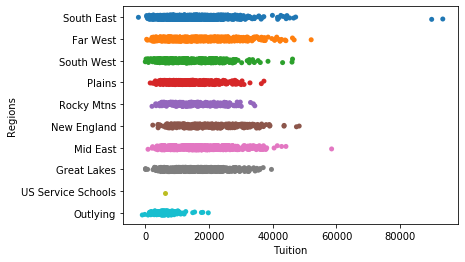

In [49]:
sns.stripplot(data=df,y="Regions",x="Tuition",jitter=True)

0.125 seconds
Samprate= 10%, Rows= 670

0.109375 seconds
Samprate= 20%, Rows= 1340

0.109375 seconds
Samprate= 30%, Rows= 2011

0.125 seconds
Samprate= 40%, Rows= 2681

0.109375 seconds
Samprate= 50%, Rows= 3351

0.140625 seconds
Samprate= 60%, Rows= 4021

0.140625 seconds
Samprate= 70%, Rows= 4691

0.15625 seconds
Samprate= 80%, Rows= 5362

0.140625 seconds
Samprate= 90%, Rows= 6032

0.15625 seconds
Samprate= 100%, Rows= 6702



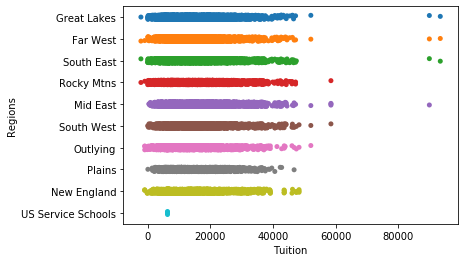

In [55]:
import time

for i in np.arange(0.1,1.1,0.1):   # 0 to 100% incr of 5 %
    start_time = time.process_time()
    df2 = df.sample(frac=i)
    sns.stripplot(data=df2,y="Regions",x="Tuition",jitter=True)
    print(time.process_time() - start_time, "seconds")
    print("Samprate= "+ str(int(i*100)) +"%, Rows= " + str(df2.shape[0])+"\n")

24.734375 seconds
Samprate= 5%, Rows= 335



KeyboardInterrupt: 

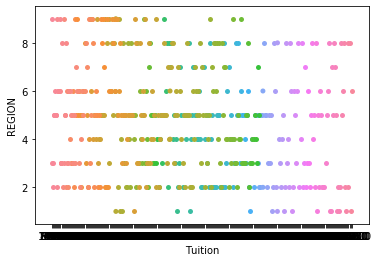

In [63]:
import time

for i in np.arange(0.05,0.15,0.05):   # 0 to 10% incr of 5 %
    start_time = time.process_time()
    df2 = df.sample(frac=i)
    sns.stripplot(data=df2,y="REGION",x="Tuition")
    print(time.process_time() - start_time, "seconds")
    print("Samprate= "+ str(int(i*100)) +"%, Rows= " + str(df2.shape[0])+"\n")

####  Always convert any variables into categorical type if they are int type and are supposed to be categorical. Else it will take a long time.

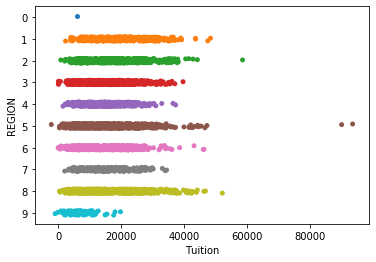

In [64]:
df["REGION"]=df["REGION"].astype('category')
sns.stripplot(data=df,y="REGION",x="Tuition")

#### SWARM PLOT

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\rakes\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


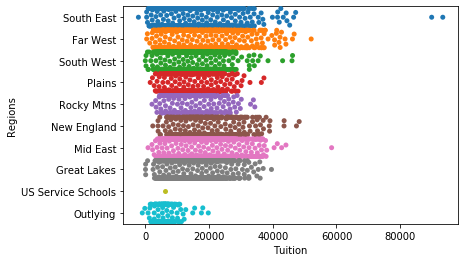

In [59]:
sns.swarmplot(data=df,y="Regions",x="Tuition")

#### BOX PLOT / VIOLIN PLOT

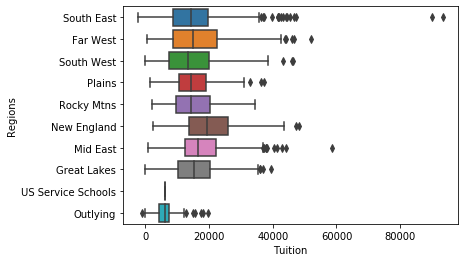

In [65]:
sns.boxplot(data=df,y="Regions",x="Tuition")

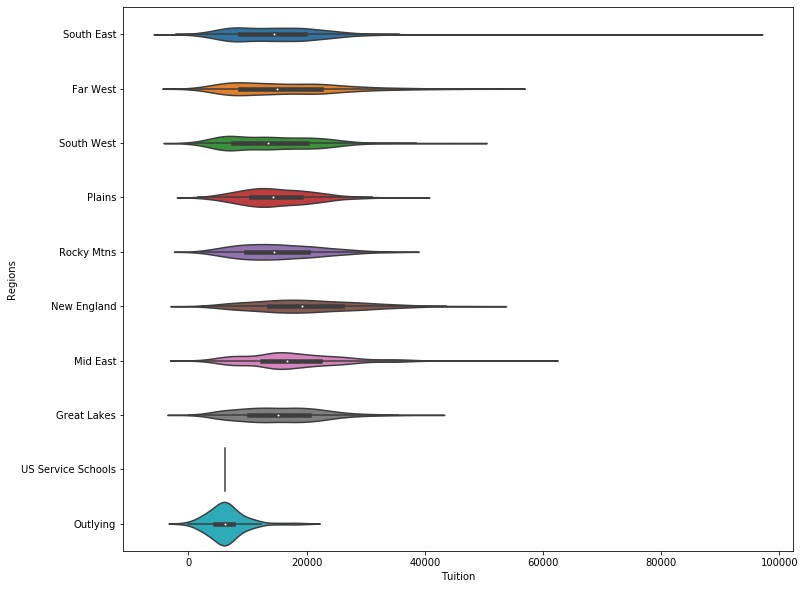

In [69]:
fig,ax = plt.subplots(figsize=(12,10))
sns.violinplot(data=df,y="Regions",x="Tuition")    # Does Kernel density cal and hence doesnt show all data points
                                                    # Can be compoutationally intensive for large data

#### LPPLOT / BOXENPLOT

Renamed as boxenplot. Can scale more easily for large dataset

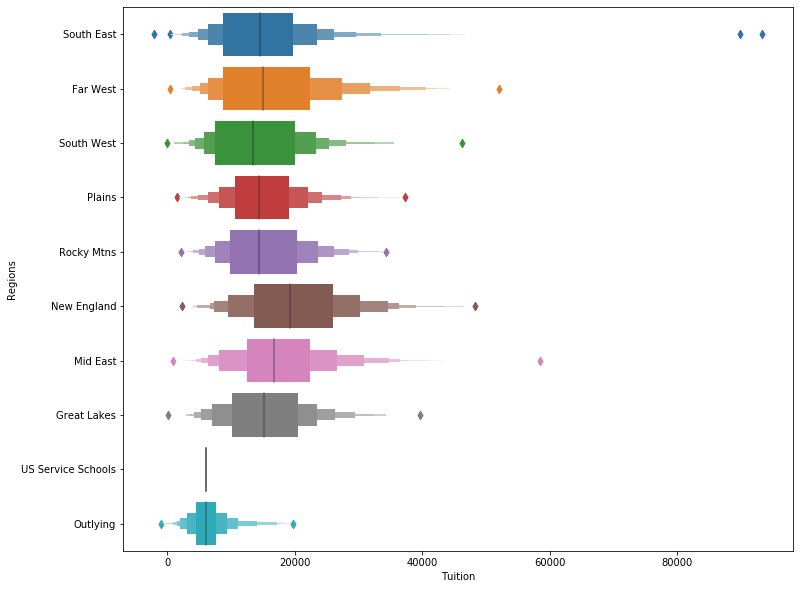

In [73]:
fig,ax = plt.subplots(figsize=(12,10))
sns.boxenplot(data=df,y="Regions",x="Tuition")

#### Barplot

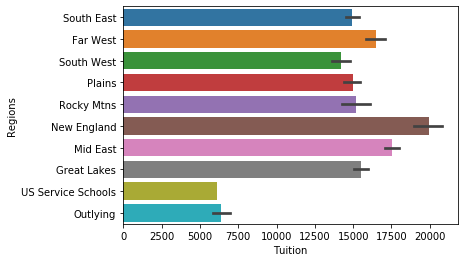

In [74]:
sns.barplot(data=df,y="Regions",x="Tuition")

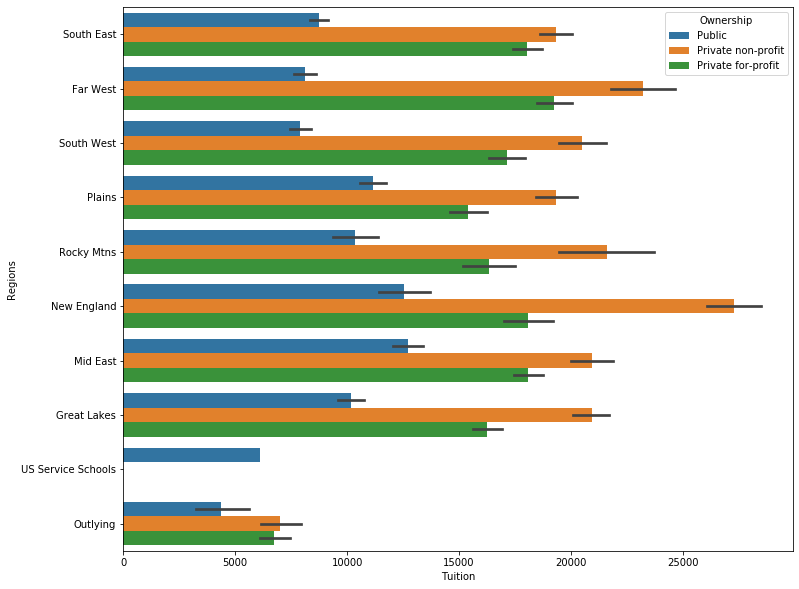

In [85]:
fig,ax = plt.subplots(figsize=(12,10))
sns.barplot(data=df,y="Regions",x="Tuition",hue="Ownership")

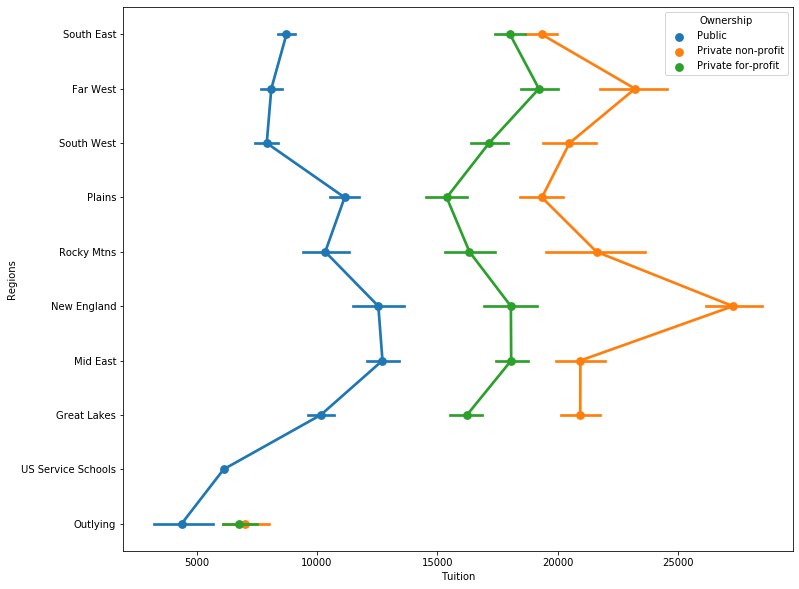

In [86]:
fig,ax = plt.subplots(figsize=(12,10))
sns.pointplot(data=df,y="Regions",x="Tuition",hue="Ownership")

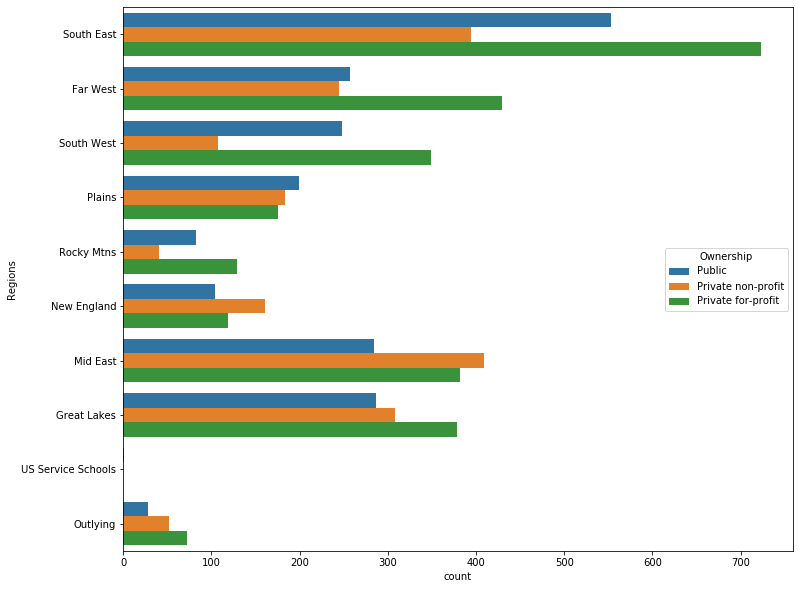

In [90]:
fig,ax = plt.subplots(figsize=(12,10))
sns.countplot(data=df,y="Regions",hue="Ownership")

### REGRESSION PLOTS

In [91]:
df = pd.read_csv("https://raw.githubusercontent.com/rakeshsukumar/python_data_viz_training/master/Input/Seaborn/bike_share.csv")

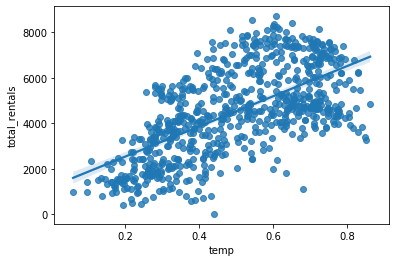

In [92]:
sns.regplot(data=df,x='temp',y='total_rentals')  # Defaults to a linear regression

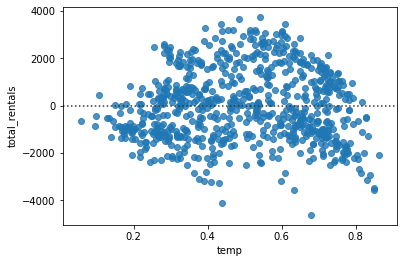

In [93]:
# RESIDUAL PLOT to understand residuals from the models and evaluate the fit
sns.residplot(data=df,x='temp',y='total_rentals')

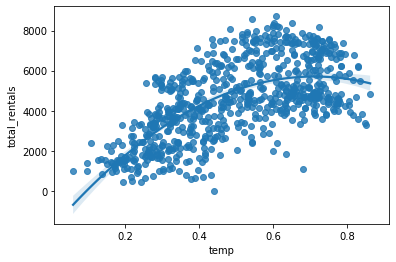

In [94]:
sns.regplot(data=df,x='temp',y='total_rentals',order=2)  # Polynomial function with order = 2

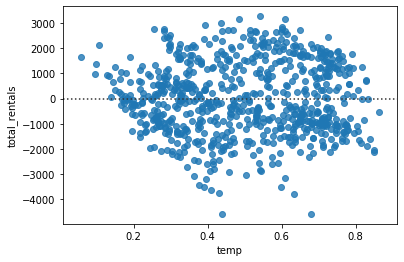

In [95]:
# RESIDUAL PLOT to understand residuals from the models and evaluate the fit
sns.residplot(data=df,x='temp',y='total_rentals',order=2)


More random residuals with a polynomial fit (order =2). Hence better fit.

#### Regression plots with Categorical variables

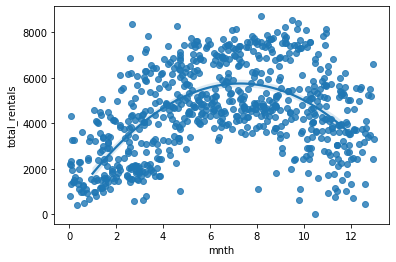

In [97]:
sns.regplot(data=df,x='mnth',y='total_rentals',x_jitter=0.1,order=2)

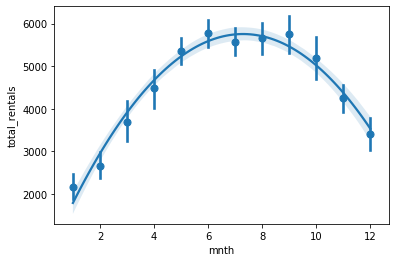

In [99]:
sns.regplot(data=df,x='mnth',y='total_rentals',x_estimator=np.mean,order=2)

#### Regression plots with Continuous variables with automated bins

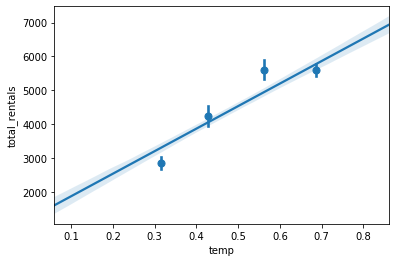

In [100]:
sns.regplot(data=df,x='temp',y='total_rentals',x_bins=4)